### 피마 인디언 당뇨병 예측

- Pima Indian DIabetes 데이터셋을 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델 만들고 평가 지표 적용하기


- 데이터셋은 캐글에서 다운로드: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


- Pregnancies: 임신 횟수

- Glucose: 포도당 부하 검사 수치

- BloodPressure: 혈압

- SkinThickness: 팔 삼두근 뒤쪽 피하지방 측정값

- Insulin: 혈청 인슐린

- BMI: 체질량지수

- DiabetesPedigreeFunction: 당뇨 내력 가중치값

- Age: 나이

- Outcome: 클래스 결정값(0 또는 1)

##### 라이브러리 정의, Outcome 클래스 결정값의 분포와 데이터 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import  f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [2]:
diabetes_data.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 유틸리티 함수인 get_clf_eval(), get_eval_by_threshold(), precision_recall_curve_plot() 이용하기 위해 정의해놓기

In [4]:
from sklearn.preprocessing import Binarizer

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
        
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid
    plt.show()

##### 로지스틱 회귀를 이용해 예측 모델 생성하기

In [5]:
#피처 데이터셋 X, 레이블 데이터셋 y 추출
#맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼위치 -1을 이용해 추출

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

#모델 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [6]:
print(pred)
print(pred_proba)

[1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0]
[0.66161545 0.35906789 0.26430486 0.4831761  0.05359471 0.72985332
 0.71822556 0.25970607 0.57696165 0.13345736 0.49344637 0.1317572
 0.17991477 0.36361204 0.53193516 0.70948673 0.15475004 0.21825156
 0.05396137 0.27209314 0.1199557  0.52457922 0.16838136 0.23695204
 0.13896197 0.1786304  0.09744204 0.16620221 0.85218295 0.72160175
 0.61038863 0.14652302 0.11496817 0.7121391  0.73844305 0.39479094
 0.25011011 0.29492893 0.23775066 0.06710913 0.22501017 0.35114593
 0.44144232 0.12999205 0.61137784 0.19234862 0.26894362 0.13557014
 0.31982305 0.14240034 0.2725478  0.31475503 0.20004802 0.80590787
 0.83647868 0.73481657 0.48609845 0.38827433 0.2126252  0.27471867
 0.65131067 0.437

In [7]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 10]
 [26 31]]
정확도: 0.7662, 정밀도: 0.7561, 재현율: 0.5439, F1:0.6327, AUC: 0.8343


- 전체 데이터의 65%가 Negative이므로 정확도보다는 재현율 성능에 초점을 맞춰보자


- 정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화 확인하기

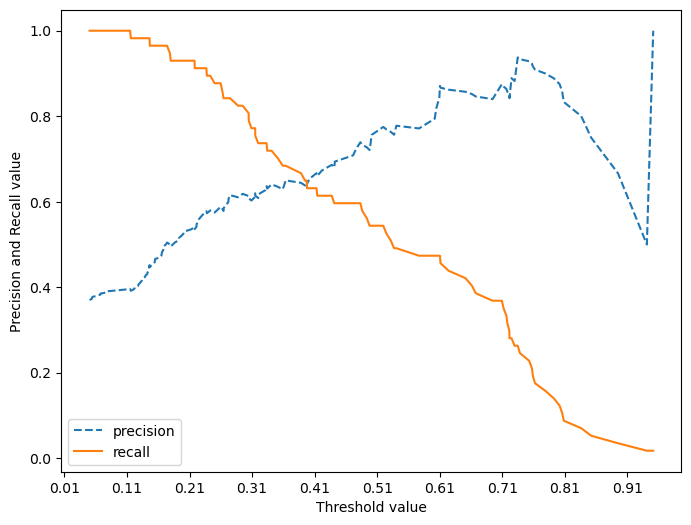

In [8]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- 임계값을 0.42정도로 낮추면 정밀도와 재현율의 균형이 맞음, 그러나 둘 모두 0.7도 안되는 수치를 보임


- 임계값을 인위적으로 조적하기 전에 다시 데이터값 점검해보자

In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


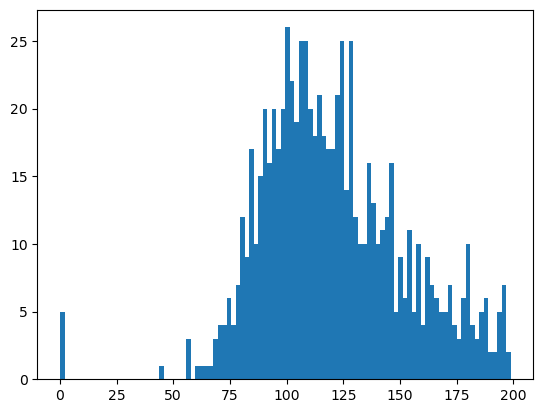

In [10]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

- describe를 보면 포도당 수치의 min이 0인 것이 말이 안되는데, 히스토그램을 그려보니 0이 상당히 존재함을 알 수 있음


- min값이 0으로 되어있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇퍼센트 비율로 존재하는지 확인해보자 >> 확인할 피처는 Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [11]:
#검사할 피처들 리스트 만들기
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터값이 0인 건수 추출, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


- SkinThickness와 Insulin의 0 건수가 많음, 전체 데이터 건수가 많지 않기 때문에 일괄적으로 삭제해버리면 학습효과가 떨어질 것 같음


- 따라서, 위 피처들의 0값을 평균값으로 대체하기

In [12]:
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

- 0값을 평균값으로 대체한 데이터셋에 피처 스케일링을 적용해 변환


- 로지스틱 회귀의 경우, 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋음

In [13]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

#피처 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#데이터분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

#모델 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [14]:
print(pred)
print(pred_proba)

[0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 0]
[0.03609018 0.20217293 0.15928588 0.5681113  0.41651923 0.75549138
 0.83987164 0.15198534 0.19444674 0.1077338  0.66955827 0.39625109
 0.04715651 0.39291971 0.26530665 0.09318057 0.79415787 0.08938344
 0.5860422  0.80457251 0.41814913 0.34954916 0.06452018 0.3194815
 0.30000267 0.10537022 0.92130861 0.75027822 0.17419735 0.88879611
 0.23061778 0.23754691 0.11313996 0.15306837 0.10329326 0.74313694
 0.2224308  0.20825111 0.85342706 0.66495884 0.41219643 0.23686881
 0.70419015 0.13055228 0.34605328 0.0150281  0.46644956 0.08887057
 0.48910823 0.33082282 0.31213555 0.91820103 0.89749958 0.06165143
 0.12671445 0.43108455 0.07021933 0.35552394 0.3317995  0.39565923
 0.18076256 0.837

In [15]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1:0.6804, AUC: 0.8433


- 데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선됨. 그러나 재현율 수치는 여전히 개선이 필요해보임


- 분류 결정 임곗값을 변화시키면서 재현율값의 성능 수치가 어느 정도 개선되는지 확인하기

In [16]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.41, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값: 0.3


TypeError: get_clf_eval() missing 1 required positional argument: 'pred_proba'

- 정확도와 정밀도를 희생하고 재현율을 높이는데 가장 좋은 임곗값은 0.33으로 재현율이 0.7963임, 그러나 정밀도가 0.5972로 매우 맞아짐


- 임곗값 0.48이 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 좋음 임곗값으로 보임


- 앞서 학습된 로지스틱회귀모델을 이용해 임곗값을 0.48로 낮추고 다시 예측해보자 >> predict 메서드에서는 임곗값 변환이 안되므로 별도의 로직을 이용해야 함(Binarizer를 이용)

In [17]:
binarizer = Binarizer(threshold=0.48)

#위에서 구한 lr_clf의 predict_proba 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))
get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1:0.6931, AUC: 0.8433
